Walmart Sales Forecasting

In [1]:
# Importing the Libraries
import pandas as pd               # for manipulating the data
import matplotlib.pyplot as plt   # for plotting the Charts
import seaborn as sns # for plotting the Charts
import numpy as np   # for numerical operations on data
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Walmart DataSet.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Understanding each variable

These variables come from a typical Walmart dataset used for retail sales analysis. Here's what each variable represents:

Store: The store number, identifying different Walmart locations.

Date: The date of the recorded sales data, which can be used to analyze trends over time.

Weekly_Sales: The total sales made by the store in a specific week (often measured in dollars). This is the dependent variable in many sales analysis models.

Holiday_Flag: A binary variable indicating whether the week includes a holiday:

1: The week has a major holiday.
0: The week does not have a major holiday. This can affect sales significantly due to holiday-related shopping patterns.
Temperature: The average temperature during the week, which can influence shopping behavior. For example, colder weather may affect customer footfall or product demand.

Fuel_Price: The average price of fuel during the week. This can indirectly impact sales since higher fuel prices may reduce discretionary spending.

CPI (Consumer Price Index): A measure that examines the weighted average of prices of consumer goods and services (e.g., transportation, food, medical care). It indicates inflation levels, which can influence consumer purchasing power.

Unemployment: The unemployment rate, which reflects the percentage of the labor force that is jobless. Higher unemployment often leads to reduced consumer spending, affecting sales.


CPI in Context:
For businesses, including Walmart, the CPI is crucial for understanding the economic environment. If the CPI rises, indicating inflation, consumer purchasing power may decrease, leading to a shift in spending habits. For example:

Customers may prioritize essential goods over discretionary items.
Demand for budget-friendly products may increase.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.045029e+06,0.069930,60.665183,3.358607,171.578394,7.871208
std,12.988182,5.572961e+05,0.255049,18.440508,0.459020,39.356712,1.520694
min,1.000000,2.099862e+05,0.000000,6.240000,2.472000,126.064000,4.294500
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2.720371e+06,1.000000,100.140000,4.468000,227.232807,11.218500


Data Cleaning

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.shape

(6435, 8)

In [7]:
df.duplicated().sum()

0

Outliers can be tested for Numerical columns only

In [8]:
# creating a variable to separate the numerical columns for numerical operations like finding outliers and stastical evidence
num_columns=df.select_dtypes(include=np.number).columns
num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [9]:
# Since Holiday flag is categorical we are excluding the column
indices_to_remove = ['Holiday_Flag'] # Creating the varible with holiday flag column
num_columns=num_columns.difference(indices_to_remove) #Removing Holiday flag columns with the help of difference function

In [10]:
num_columns

Index(['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales'],
      dtype='object')

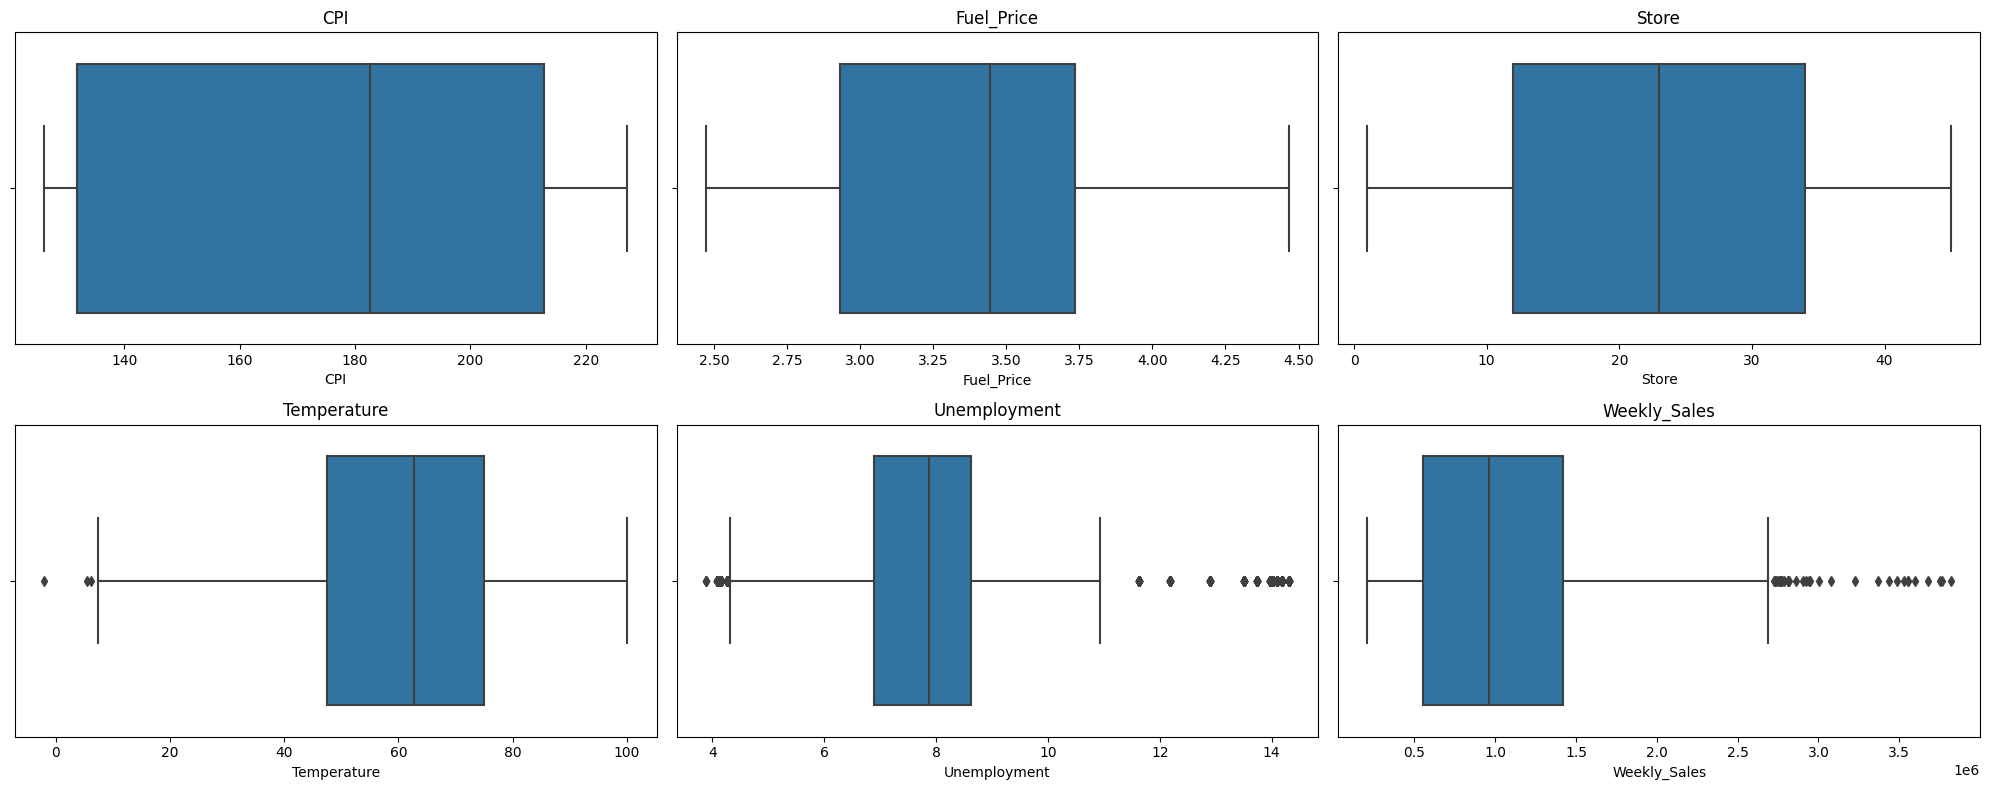

In [11]:
# Finding Outliers: with the help of box plot we are trying to plot outliers in numeric columns. so that we can treat outliers
plt.figure(figsize=(20,8)) # setting the frame size for multiple plots

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show()    # for showing the plots

Points outside whiskers: These are outliers, defined as data points that lie more than 1.5 * IQR below Q1 or above Q3.
Outliers are the dots outside the whiskers in the boxplots. Each point represents a data value significantly higher or lower than the majority of the data.

Temperature, Unemployment and Weekly_Sales show significant outliers.

In [12]:
# Defining the function that can set the inter quartaile range which can define outliers range.
def remove_outliers(df1,col): # defing function name as remove_outliers
# Setting the Q1 range at the 0.25 percentile, which means the data falling below the 0.25 percentile will be treated as outliers.
    q1=df1[col].quantile(0.25)
# Setting the Q3 range at the 0.75 percentile, which means the data falling below the 0.75 percentile will be treated as outliers.
    q3=df1[col].quantile(0.75) #
    IQR=q3-q1  # Setting the Inter Quartaile Range by subtracting the Q3 From Q1.
    Lower_Band = q1-1.5*IQR # Setting the lower band for separate the outliers
    Upper_Band = q3+1.5*IQR # Setting the Upper band for separate the outliers
    df[col]=np.clip(df[col],Lower_Band,Upper_Band) # removing the data points which are falls below and above the upper bands and lower bands
    return df1 # Return dataset

# Defining the function that can remove outliers
def treat_outliers(df1,col_list):# defing function name as treat_outliers
    for col in col_list:              # Using for loop to loop through col list of numeric column which we created earlier and dataset
        df1=remove_outliers(df1,col) # removing the outliers from the data
    return df1 # Return the dataset

In [13]:
df=treat_outliers(df,num_columns)

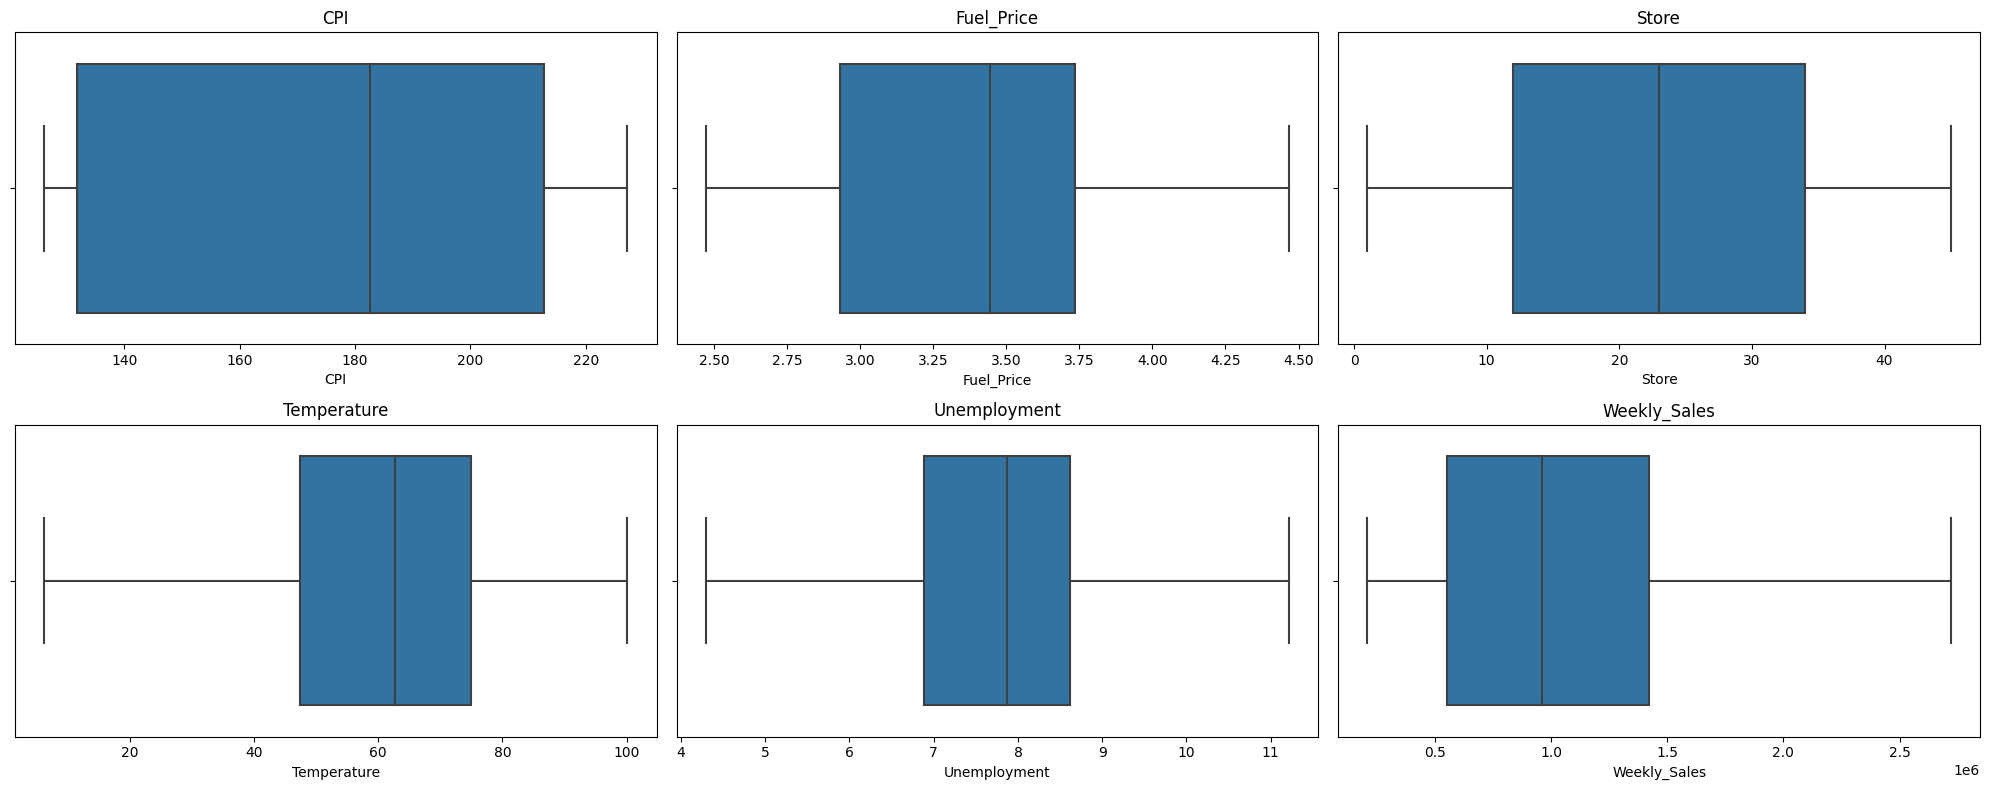

In [14]:
# Cross Checking the Outliers after deleting the outliers.
plt.figure(figsize=(20,8)) # setting the frame size for multiple plots

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show()    # for showing the plots

Exploratory Data Analysis

In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Target variable- Weekly Sales (Dependent variable)

In [18]:
df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [16]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

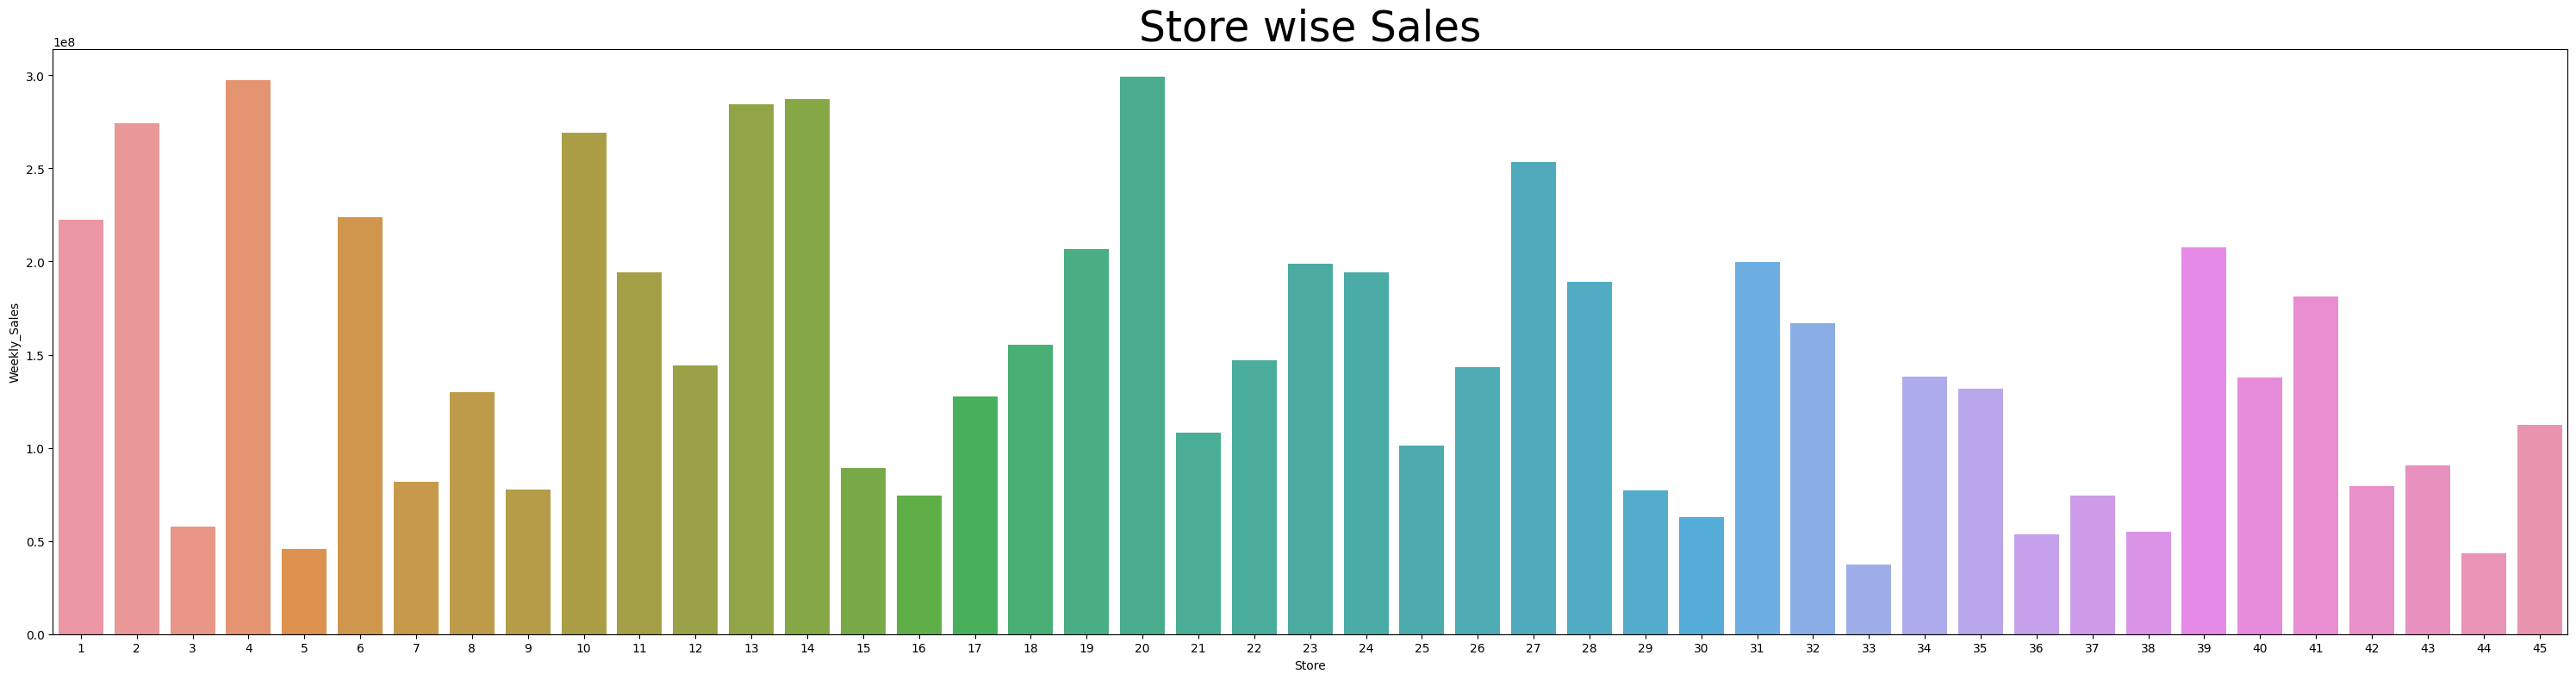

In [17]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
#plt.xlabel('Store',fontsize=25)
#plt.ylabel('Weekly_Sales',fontsize=25)
plt.tight_layout()
plt.show()

Since we have 45 stores we cant take all the store sales. so we tried to plot top and botttom 10 stores saleswise.

In [20]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
# Looking the dataframe
top_10_Sale_Store

,Store,Weekly_Sales
19,20,2.990663e+08
3,4,2.973575e+08
13,14,2.870091e+08
12,13,2.845247e+08
1,2,2.741628e+08
9,10,2.692807e+08
26,27,2.534795e+08
5,6,2.237489e+08
0,1,2.224028e+08
38,39,2.074455e+08


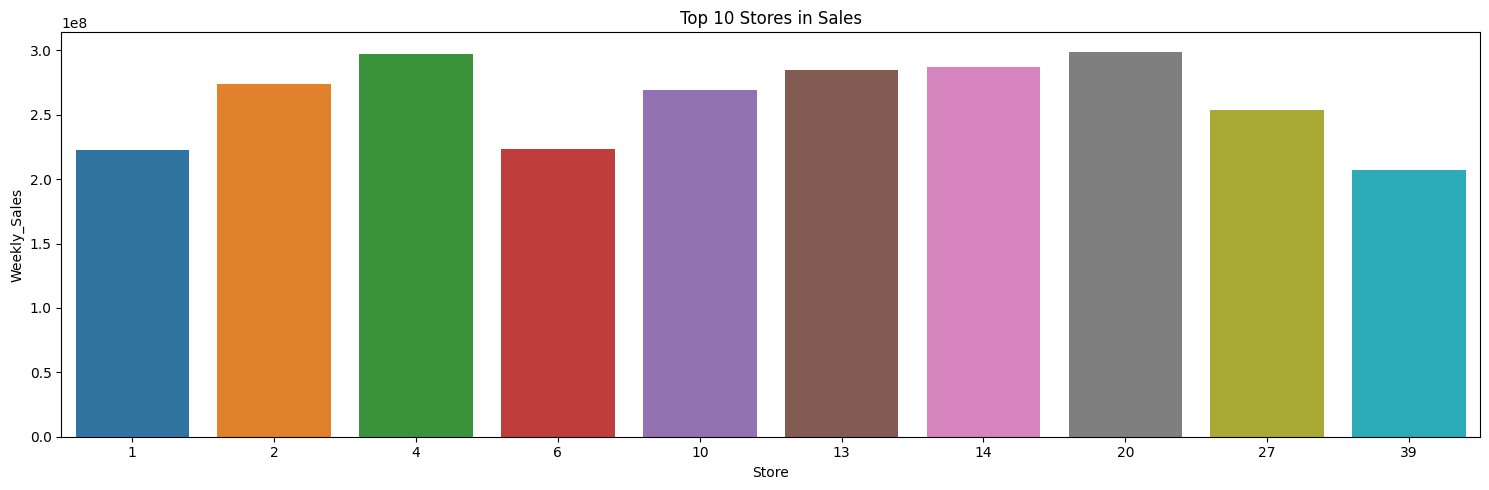

In [21]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) # creating the barplot
plt.title('Top 10 Stores in Sales') # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # showing the plot

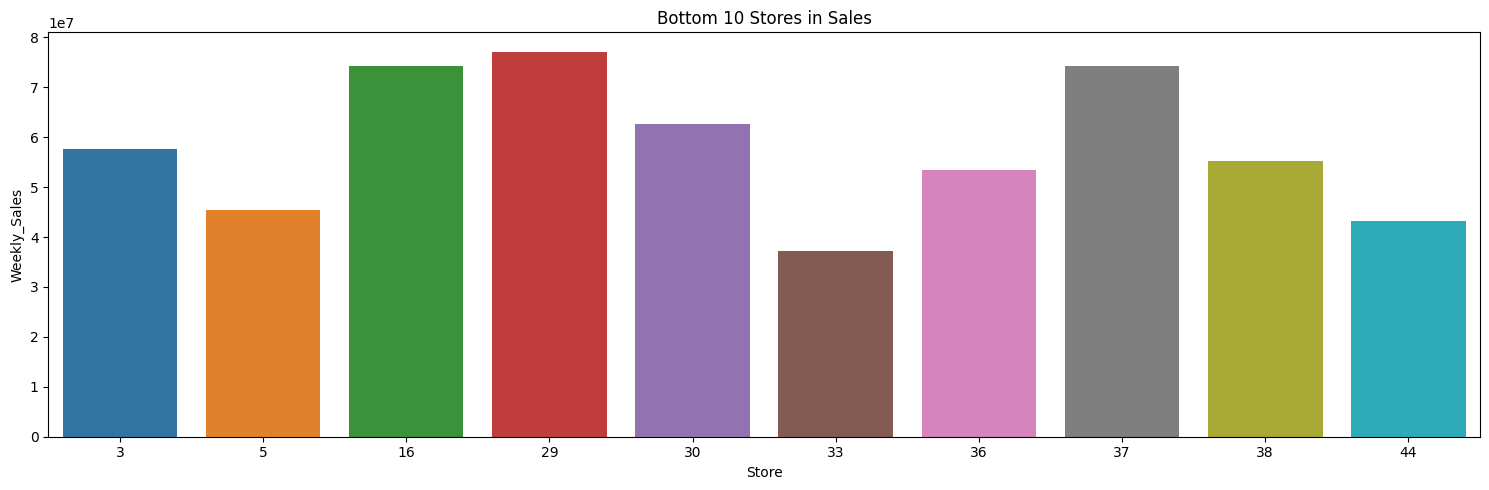

In [22]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest  weekly sales
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store # Lokking at the data

# plotting the Bottom 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store) # creating the barplot
plt.title('Bottom 10 Stores in Sales') # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # Showing the plots

In [23]:
# Converting the data type of the date column to date time format from "object" Type
df['Date']=pd.to_datetime(df['Date'])

In [25]:
# Creating the dataframe by grouping the date and summing all the weekly sales for the particular 'Date'
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_date_sales.head(5) # Looking at first five data points

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


Text(0, 0.5, 'Sales')

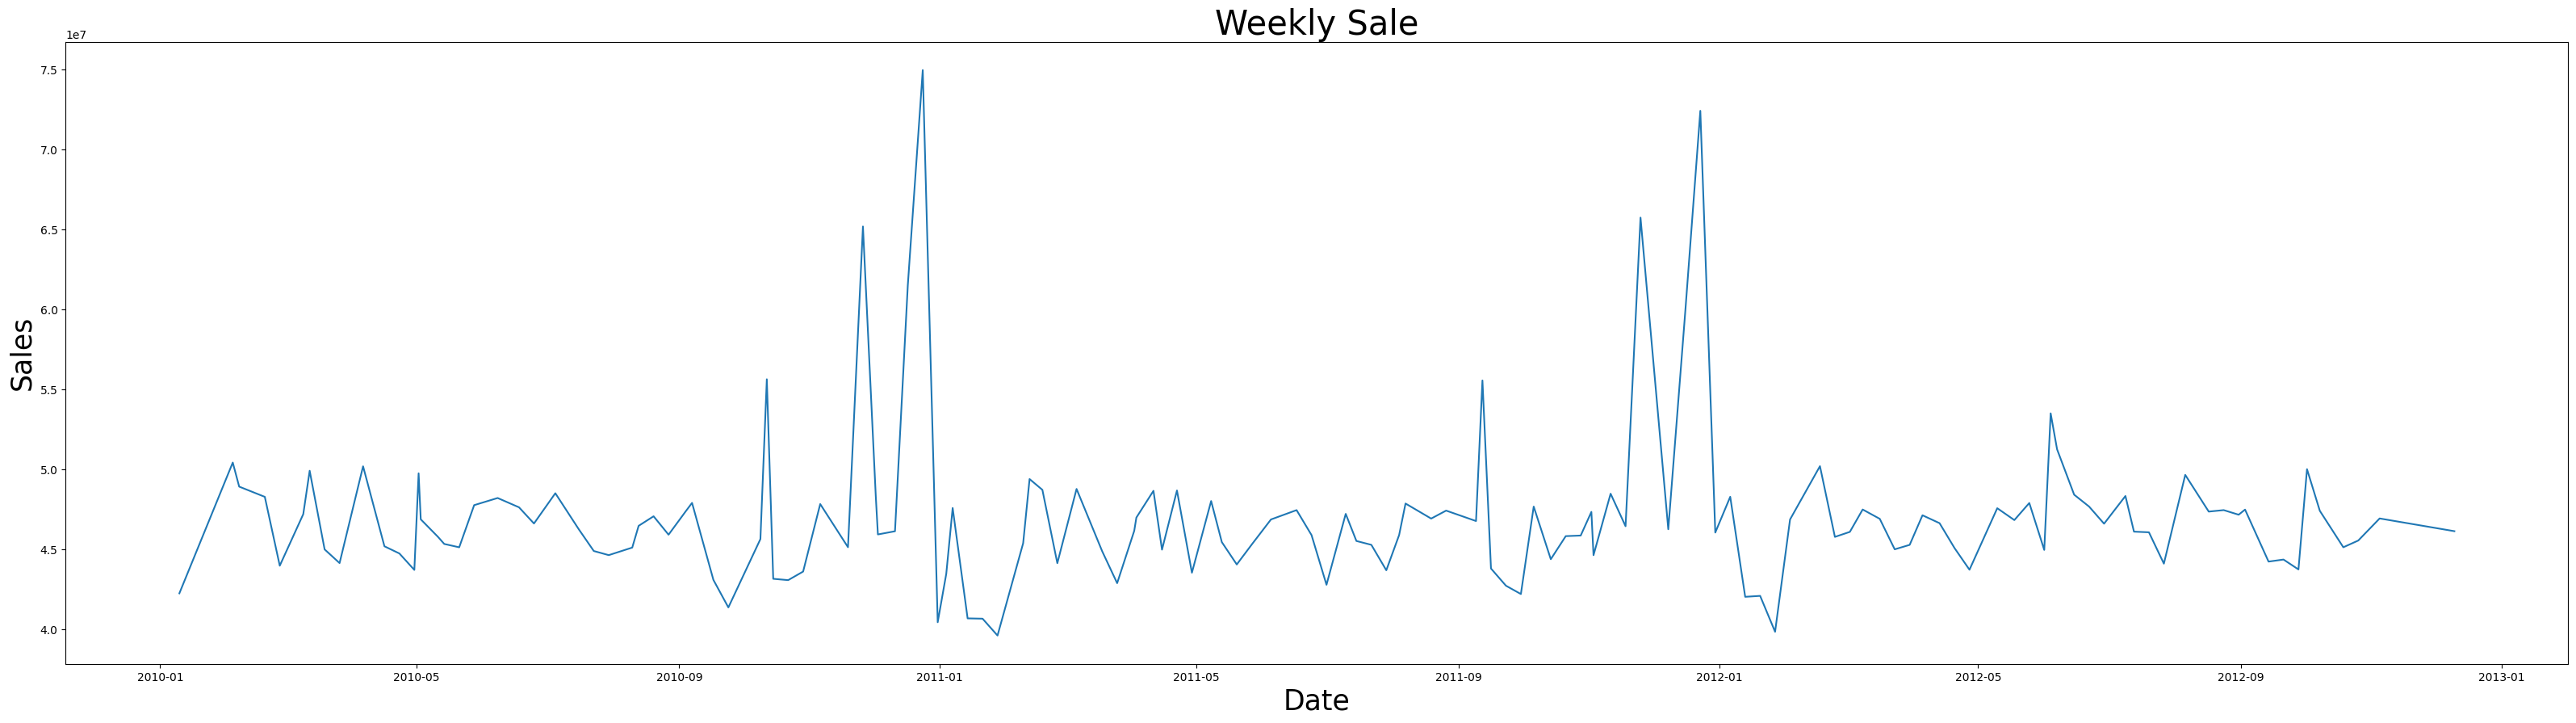

In [26]:
# Plotting the line chart for checking the trend of weekly sales
plt.figure(figsize=(40,10)) # Setting the size for plot
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales) # line plot
plt.title('Weekly Sale',fontsize=30) # setting titile
plt.xlabel('Date',fontsize=25) # xLabel as Date
plt.ylabel('Sales',fontsize=25) # Ylabel as Sales

In [27]:
# Categorizing the sales into quarters
df['Quarters'] = df['Date'].dt.to_period("Q")

Correlation Analysis between weekly sales and other Numeric variables

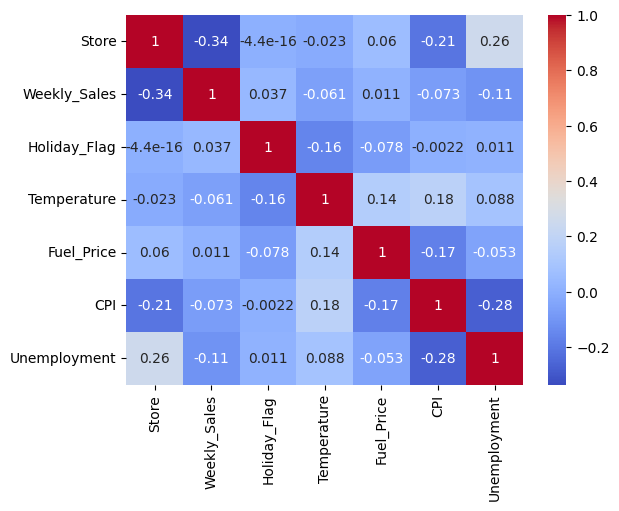

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is in a pandas DataFrame called df
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


Values close to 1/-1: Strong positive/negative correlation.

Values close to 0: Weak or no correlation.

Variable-Specific Insights

Store vs Weekly_Sales:

Correlation: -0.34 (moderate negative correlation).
This suggests that some stores tend to have lower sales than others, but this might not be a strong determinant.

Weekly_Sales vs Holiday_Flag:

Correlation: 0.037 (weak positive correlation).
Holidays have a minimal direct linear relationship with sales, but this doesn't mean holidays don't influence sales—it might indicate non-linear or more complex effects.

Weekly_Sales vs Temperature:

Correlation: -0.061 (weak negative correlation).
This suggests that temperature has a minimal linear impact on weekly sales.

Weekly_Sales vs Fuel_Price:

Correlation: 0.011 (negligible correlation).
Fuel prices seem to have no linear relationship with weekly sales, but indirect effects (e.g., on transportation costs) may exist.

Weekly_Sales vs CPI:

Correlation: -0.073 (weak negative correlation).
Higher CPI (reflecting inflation) might slightly reduce weekly sales, but the impact is weak.

Weekly_Sales vs Unemployment:

Correlation: -0.11 (weak negative correlation).
Higher unemployment may lead to slightly lower weekly sales, but the relationship is not strong.

Broader Implications
Weak Correlations: Most variables have weak linear relationships with Weekly_Sales, as evidenced by their small correlation coefficients.

Non-Linear Effects: Some variables, like Holiday_Flag, may have non-linear relationships that are not captured by correlation alone.

Store-Specific Sales Patterns: The moderate negative correlation between Store and Weekly_Sales suggests store-specific effects that should be explored further (e.g., location, size, customer demographics).

Model building

In [28]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarters
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2


ARIMA Model

The name ARIMA reflects its three key components:

AR (AutoRegressive):

Refers to the use of past values to predict future values.
It involves a linear combination of previous observations.

Represented by the parameter 𝑝
p: the number of lagged observations included in the model.

I (Integrated):

Refers to the differencing of raw observations to make the time series stationary (i.e., having constant mean and variance over time).
A time series is stationary if it does not exhibit trends or seasonality.

Represented by the parameter 𝑑
d: the number of differencing steps needed.

MA (Moving Average):

Refers to the dependency between an observation and residual errors from a moving average model applied to past observations.

Represented by the parameter 𝑞
q: the size of the moving average window




Check Stationarity:

Use methods like the Augmented Dickey-Fuller (ADF) test to assess stationarity.
If the series is not stationary, apply differencing (𝑑).

In [29]:
# Excluding all the varibales.. and considering the date and sales data for model building
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [30]:
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index

In [31]:
from statsmodels.tsa.stattools import adfuller # importing the adfuller for check the data stationarity

# check for stationarity
def adf_test(series, title=''): # creating a function

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [32]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.797936e+00
p-value                 6.103233e-17
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [33]:
# Importing the seasonal decompose for break down the components of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


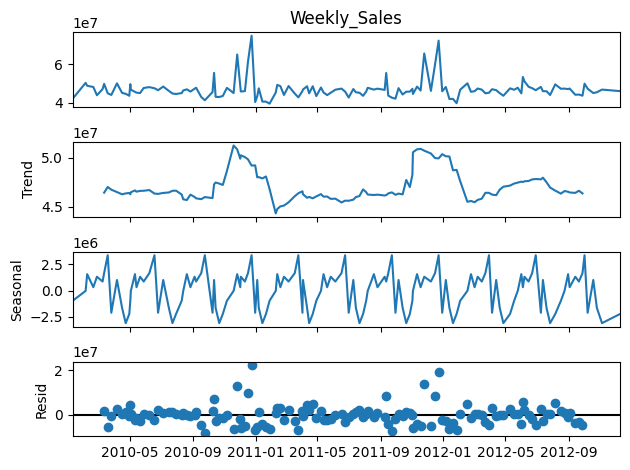

In [35]:
print(decomposition.plot())# Plotting the components of the data

In [36]:
mean1=df_stores_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=df_stores_sales.rolling(window=10).std() # Creating the Rolling standard deviation

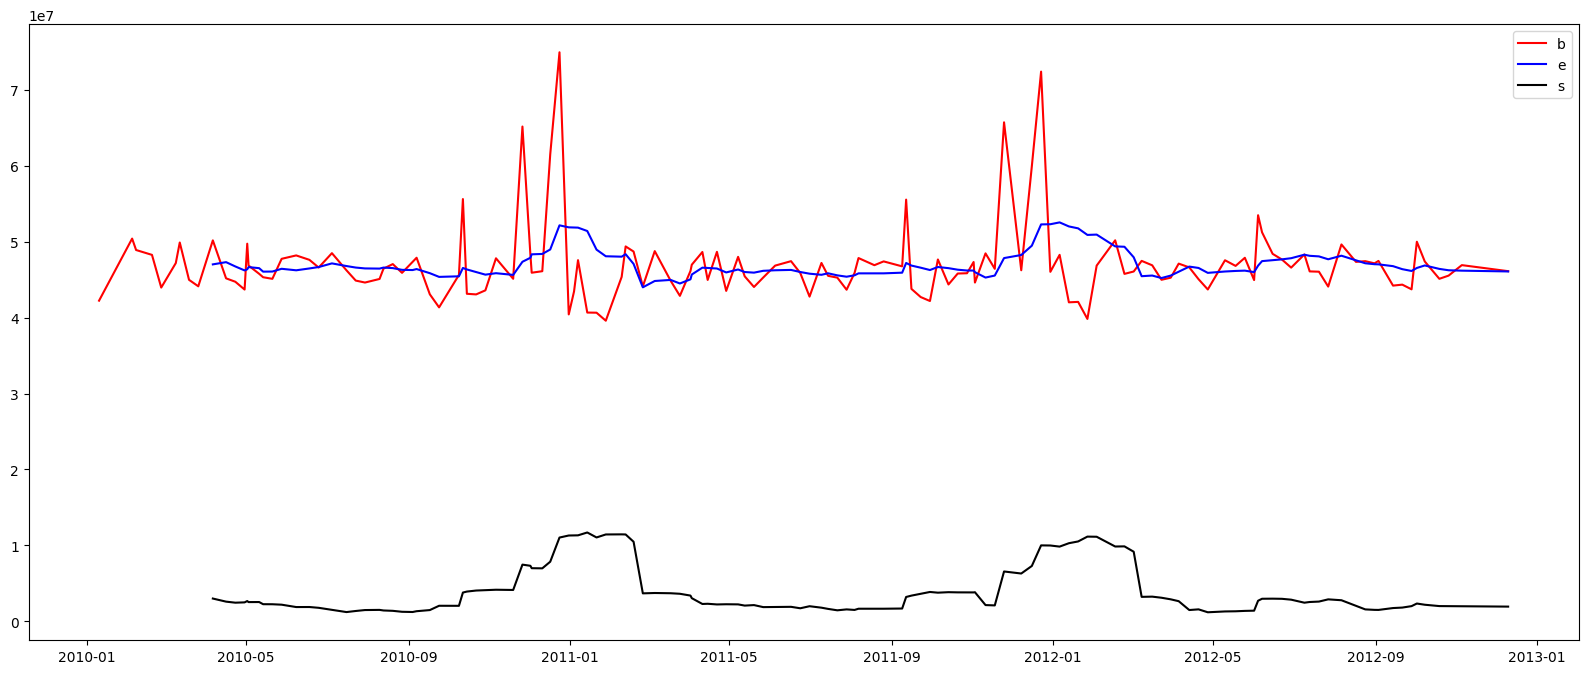

In [37]:
# plotting the rolling mean and standard deviation with respect to weekly sales
plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

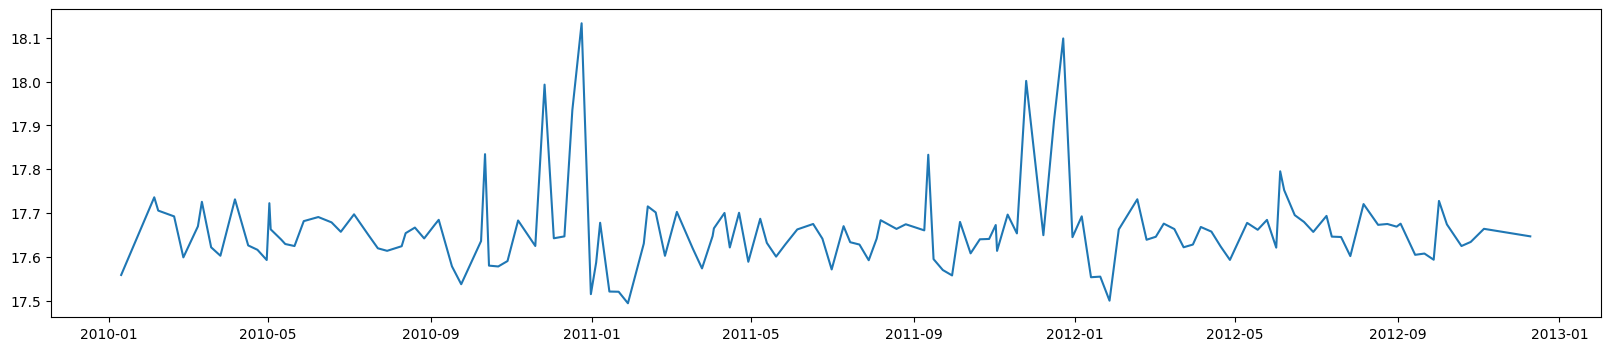

In [38]:
df_log = np.log(df_stores_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

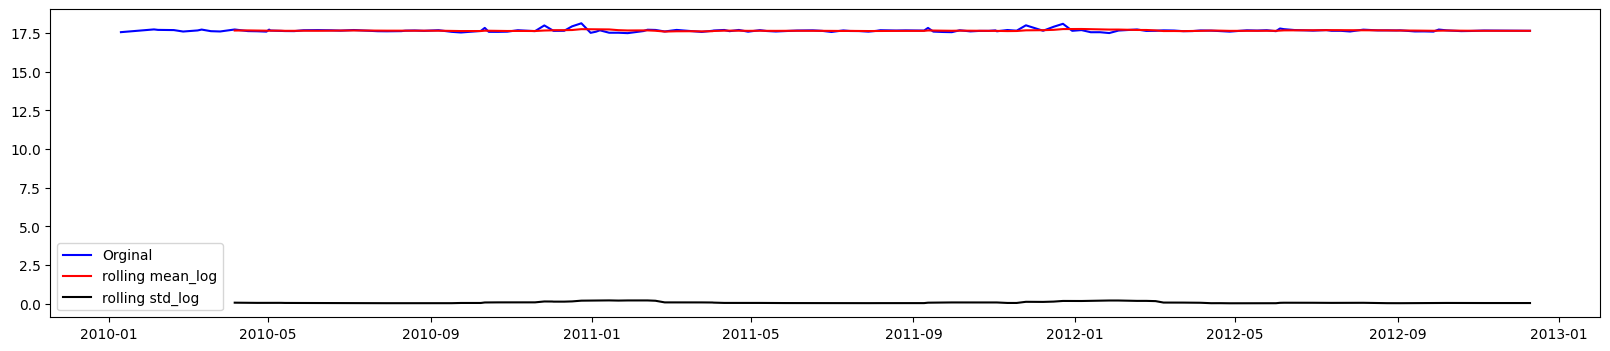

In [39]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation are colse
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [40]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-01-10,NaN
2010-02-04,NaN
2010-02-07,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-09,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN


In [41]:
df_new.dropna(inplace = True) # dropping the nan values

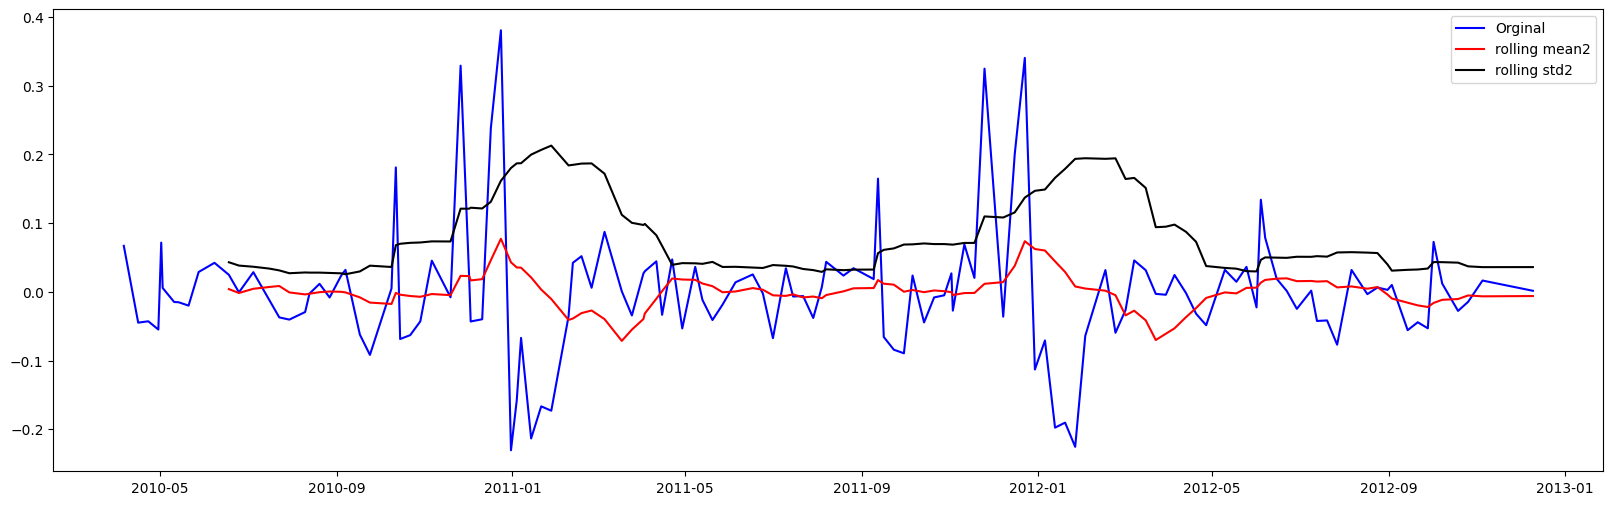

In [42]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [43]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.029840e+00
p-value                 5.482779e-15
# lags used             0.000000e+00
# observations          1.330000e+02
critical value (1%)    -3.480500e+00
critical value (5%)    -2.883528e+00
critical value (10%)   -2.578496e+00
Rejects the null hypothesis
Data has no unit root and is stationary


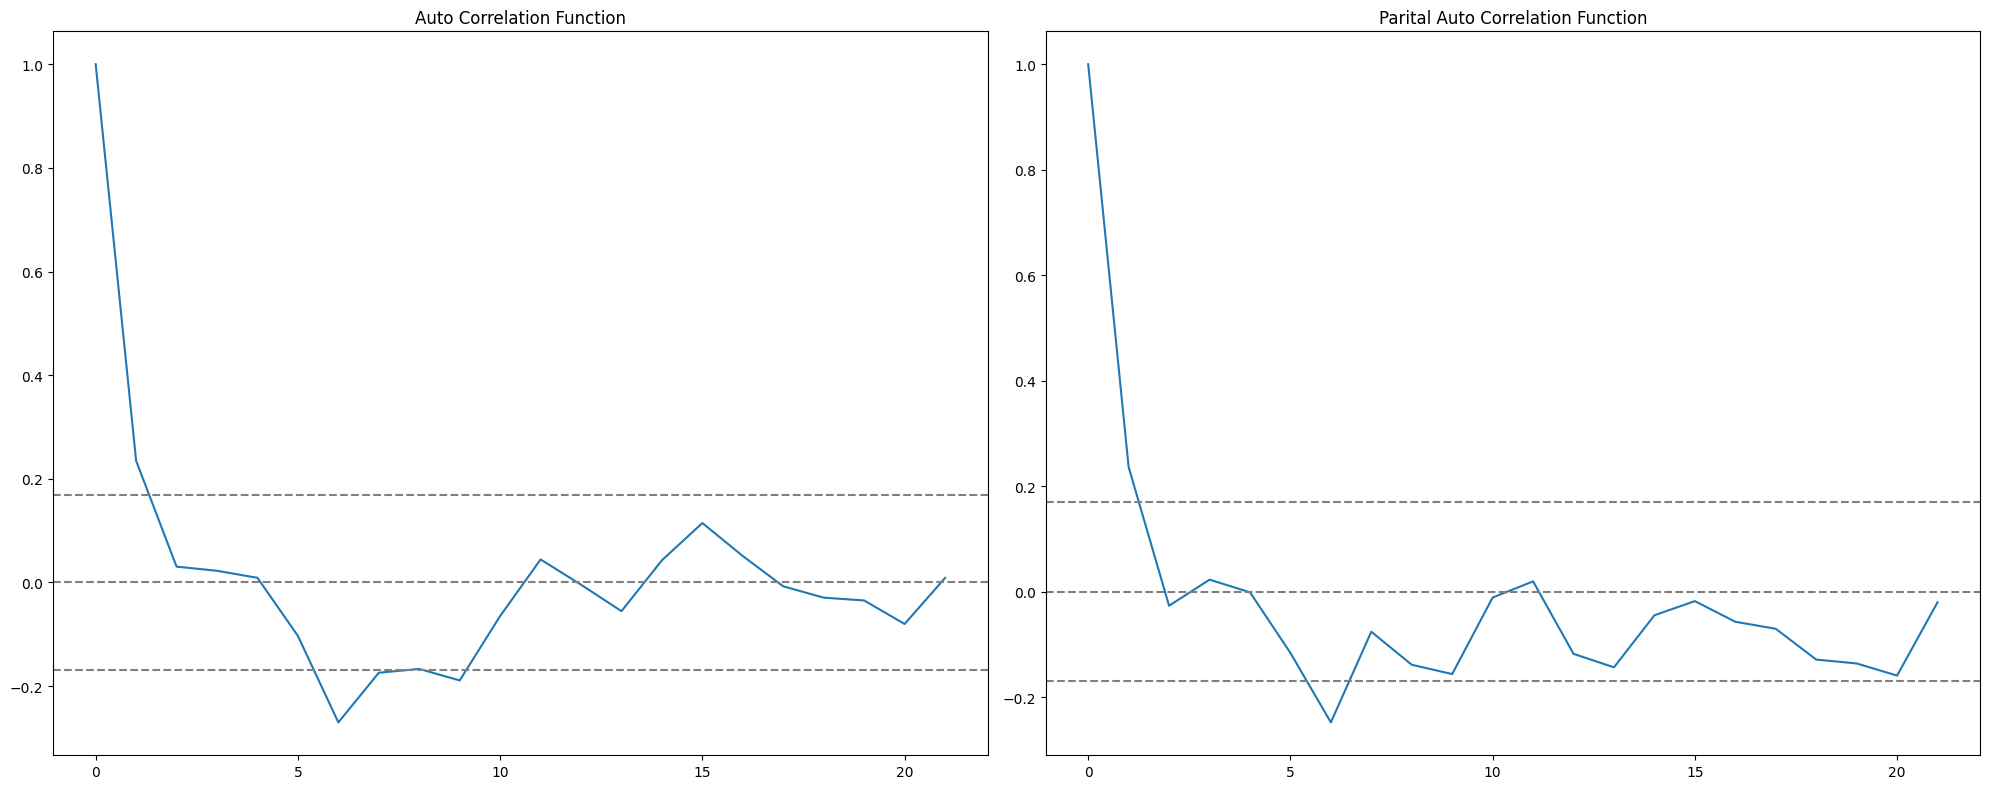

In [44]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

1. p (Autoregressive Order):
Use the PACF plot to determine p.
Look for the number of significant lags (bars) in the PACF plot that exceed the confidence intervals (dotted lines).
Cut-off behavior: If the PACF plot shows a sharp drop-off (becomes insignificant) after a specific lag, that lag is the likely p value.
2. q (Moving Average Order):
Use the ACF plot to determine q.
Look for the number of significant lags in the ACF plot.
Cut-off behavior: If the ACF plot sharply cuts off after a specific lag, that lag is the likely q value.

assuming p is 5 and q is 3, actually p is 2 and q is 3 

In [62]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(2, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

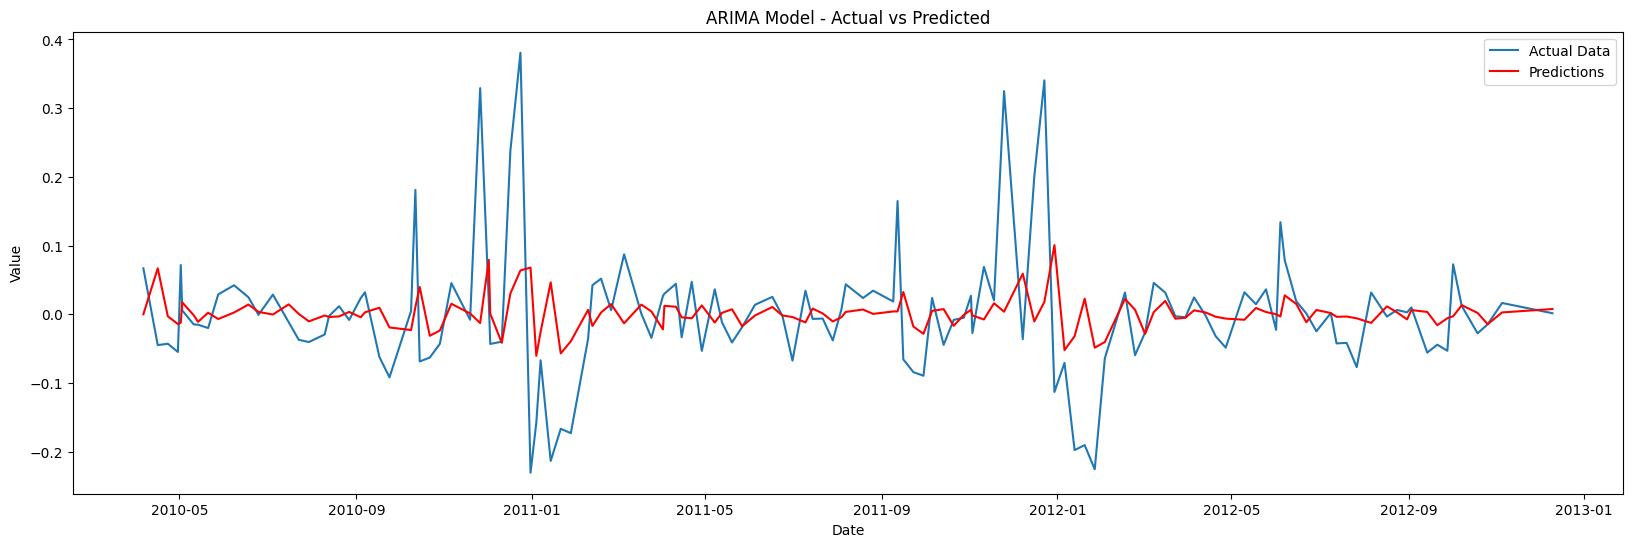

In [63]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.008412306364906674


In [65]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.0917186260522184


Store wise prediction

Store 1 Sales Forecast

In [66]:
# Creating a new data frame for store 1 sales forecast
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [67]:
store1_sales.set_index('Date',inplace=True) # Setting the date column as an index

In [68]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.595634e+00
p-value                 1.981888e-16
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [69]:
# Importing the seasonal decompose for break down the components of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

Figure(640x480)


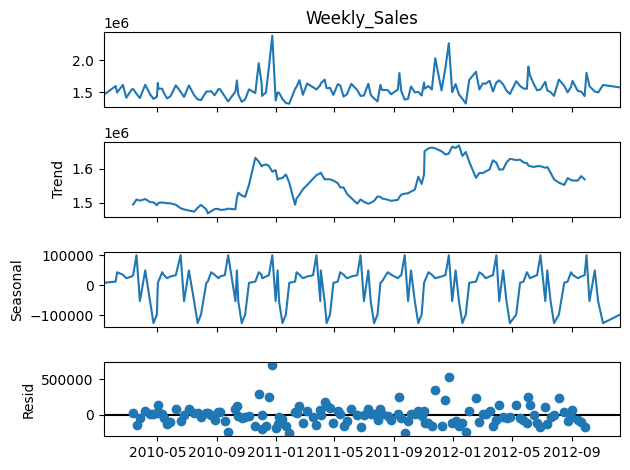

In [71]:
print(decomposition.plot())

In [72]:
mean1=store1_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store1_sales.rolling(window=10).std() # Creating the Rolling standard deviation

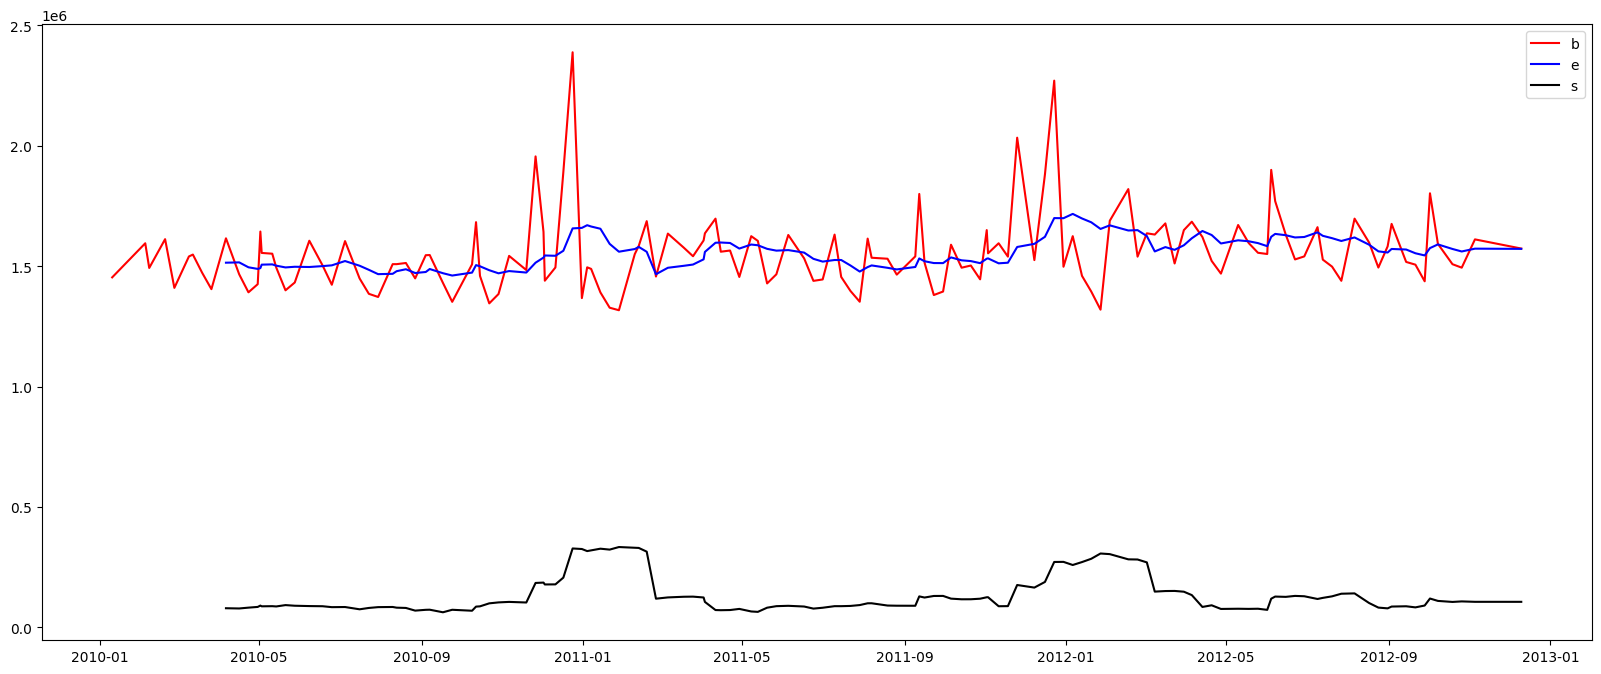

In [73]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

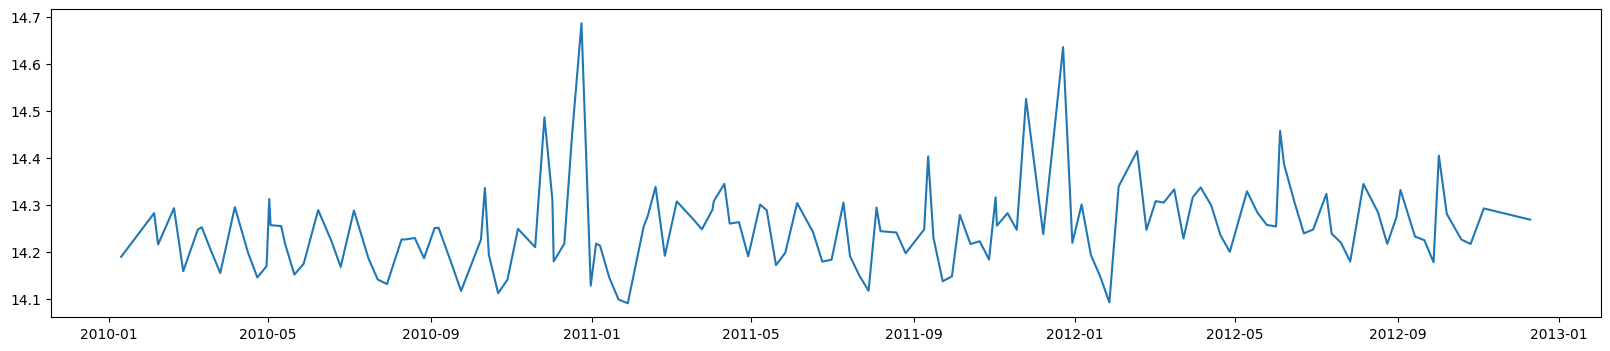

In [ ]:
df_log = np.log(store1_sales)# applying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

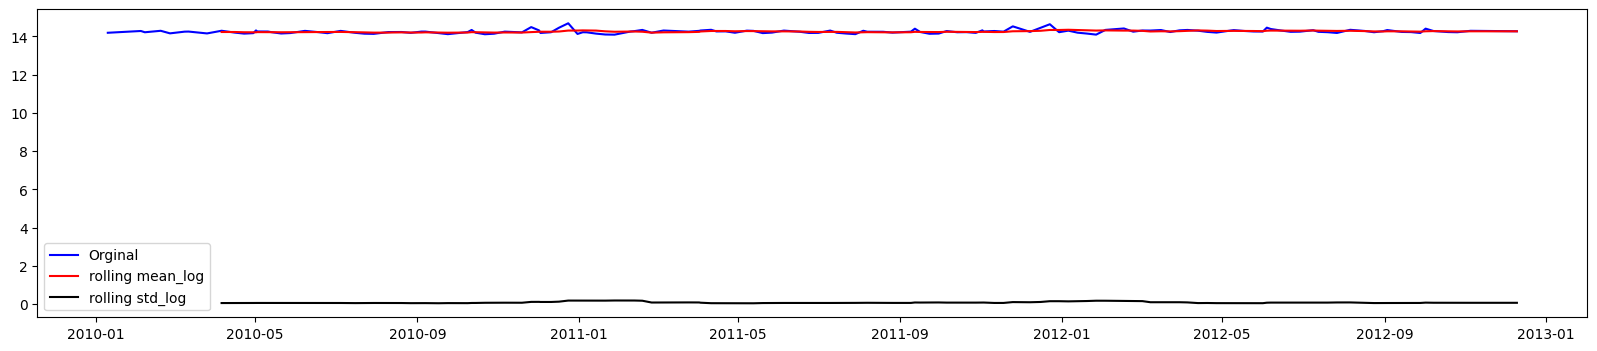

In [75]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [76]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-01-10,NaN
2010-02-04,NaN
2010-02-07,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-09,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN


In [77]:
df_new.dropna(inplace = True) # dropping the nan values

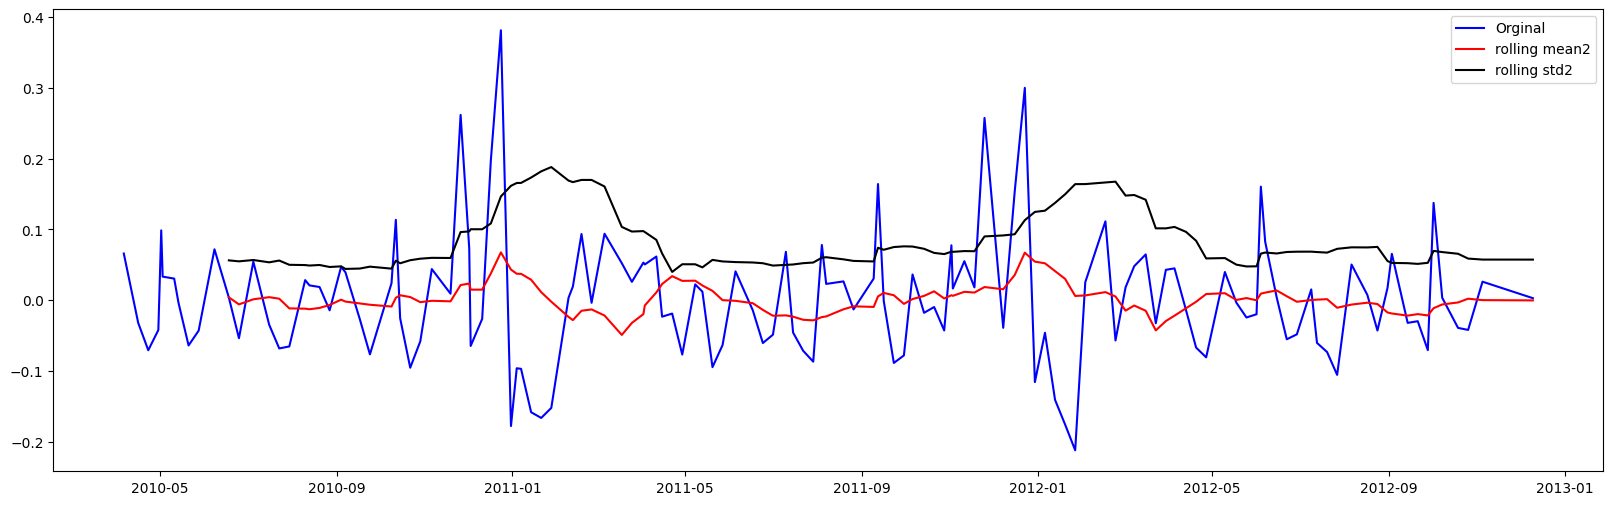

In [78]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [79]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.254118e+00
p-value                 4.381186e-08
# lags used             7.000000e+00
# observations          1.260000e+02
critical value (1%)    -3.483346e+00
critical value (5%)    -2.884766e+00
critical value (10%)   -2.579156e+00
Rejects the null hypothesis
Data has no unit root and is stationary


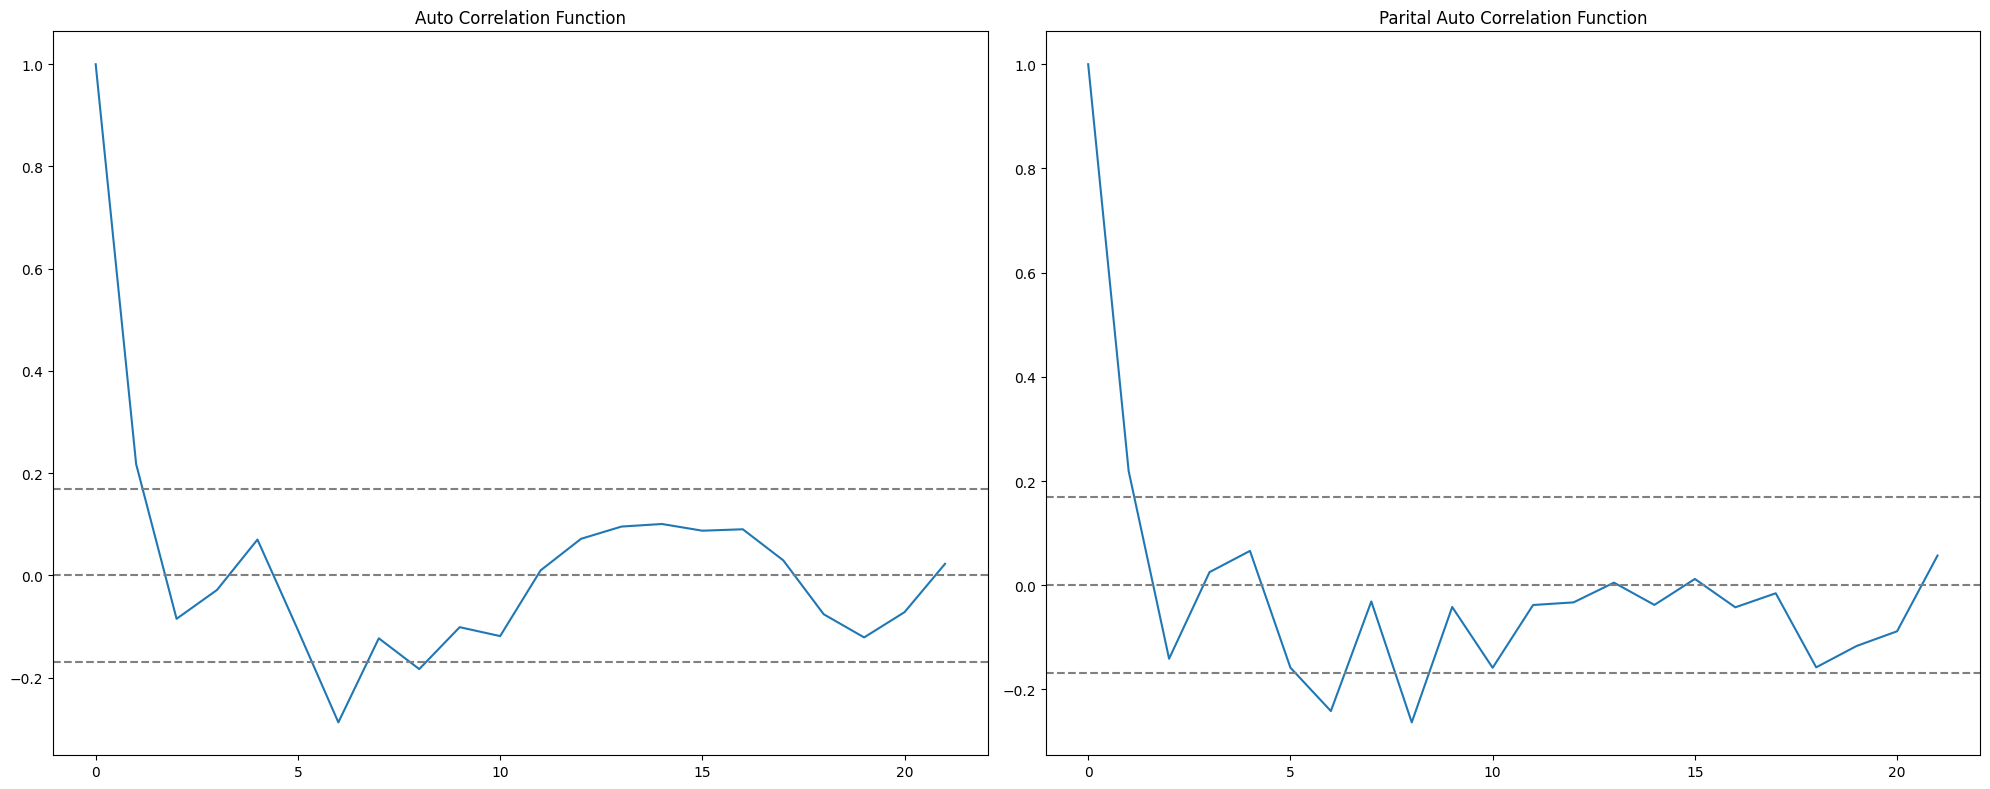

In [80]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

q=3 and p is 2

In [81]:
p, d, q = 2, 1, 3  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

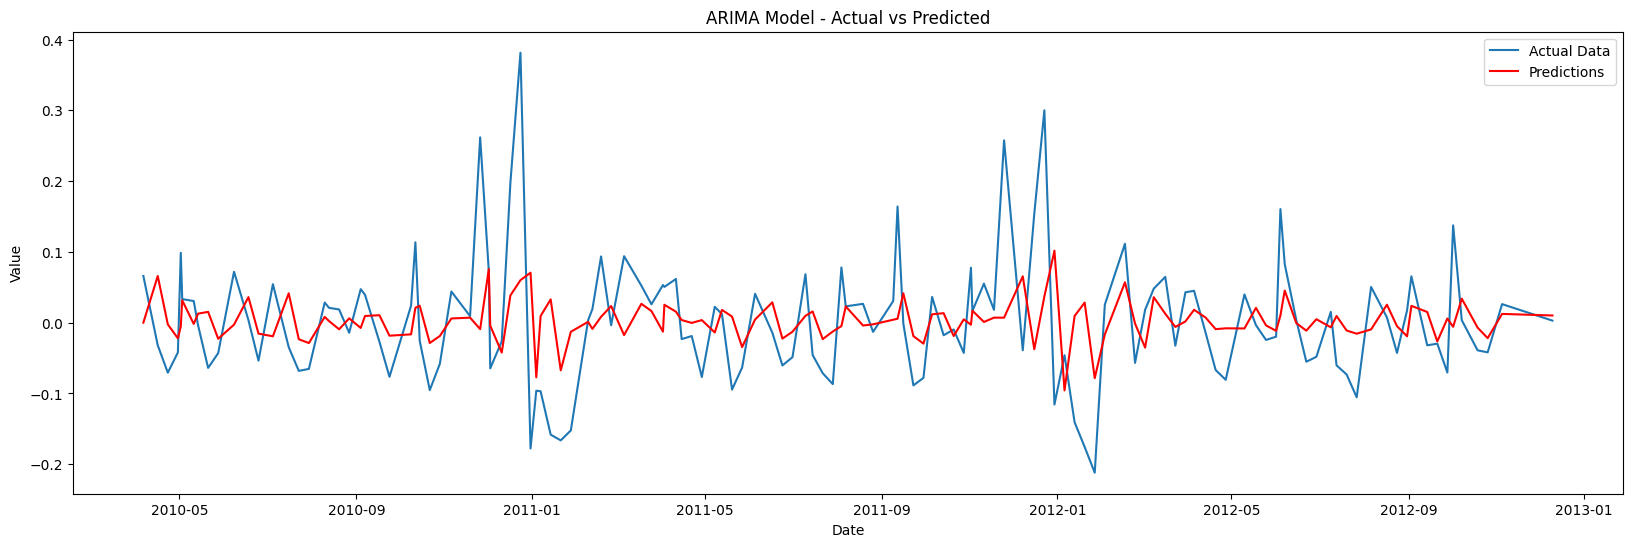

In [82]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.007380657924293162


In [84]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.08591075557980596


In [85]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [86]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [87]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [88]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [89]:
forecast_df.set_index('Date',inplace=True)

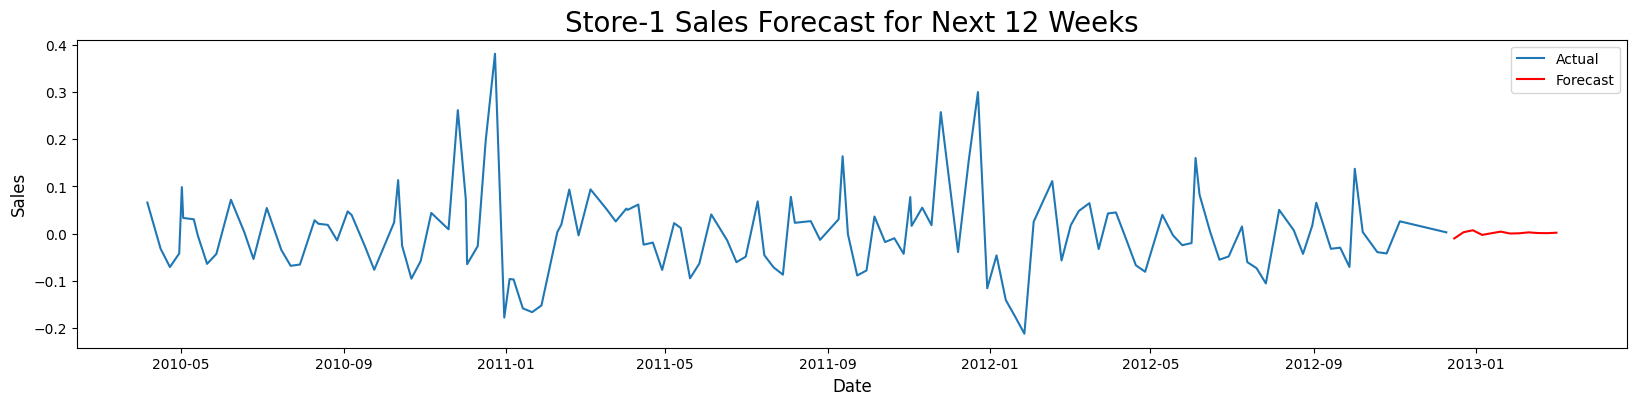

In [90]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [91]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.08591075557980596


Similarly we can predict for all independent stores using moving average